<a href="https://colab.research.google.com/github/noambassat/SupremeCourtClassifier/blob/main/4_explore_and_merge_RAP_AP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [396]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import ast

In [397]:

# contains_raap = sample_df["גוף המסמך"].str.contains('רע"פ', na=False)

# # ספירה של כמה מסמכים מכילים את המילה רע"פ וכמה לא
# count_yes = contains_raap.sum()
# count_no = len(contains_raap) - count_yes

# # הדפסת הספירה
# print(f"מספר המסמכים שמכילים את המילה 'רע\"פ': {count_yes}")
# print(f"מספר המסמכים שלא מכילים את המילה 'רע\"פ': {count_no}")

# # סינון הדאטה לשמירת רק המסמכים שכן מכילות את המילה
# sample_df = sample_df[contains_raap]

# # שמירה לקובץ חדש אם יש צורך
# output_file = "filtered_sample_with_raap.csv"
# sample_df.to_csv(output_file, index=False, encoding="utf-8")
# print(f"הדאטה המסונן נשמר לקובץ: '{output_file}'")


In [398]:
full_final_df = pd.read_csv("full_final_df_cleaned.csv", engine="python")


In [399]:
full_final_df["Outcome of case"].isna().sum()

0

In [400]:
full_final_df

,מספר תיק,מספר החלטות בתיק,שם הליך,שנת פתיחת ההליך,מספר הליך,סוג הליך,פירוט סוג הליך,תיק חסוי,תאריך אירוע אחרון,משך התיק בימים,...,Justice name 5,"מס סידורי של הפס""ד הממופים",מי ערער על החלטת המחוזי (ביחס למעמדו במחוזי),שם השופט הראשון במותב,"חודש קבלת פס""ד הנבחן",Justice 4’s activity,"יום קבלת פס""ד הנבחן",Justice 5’s activity,"שנת קבלת פס""ד הנבחן",Justice name 4
0,9917/02,12,"ע""פ 9917/02 אכרמ זהרה נ. מדינת ישראל",2002,"ע""פ 9917/02","ע""פ",ערעור פלילי,0.0,2007-09-25,1635,...,NaN,27.0,Defendant,Edmond Levy,May,NaN,17.0,NaN,2007.0,NaN
1,845/02,9,"ע""פ 845/02 מדינת ישראל נ. תנובה מרכז שיתופי לש...",2002,"ע""פ 845/02","ע""פ",ערעור פלילי,0.0,2008-01-09,2082,...,NaN,75.0,Plaintiff,Dorit Beinisch,October,NaN,10.0,NaN,2007.0,NaN
2,4379/02,2,"ע""פ 4379/02",2002,"ע""פ 4379/02","ע""פ",ערעור פלילי,1.0,1900-01-01,-2,...,Missing,18.0,Defendant,Misha'el Kheshin,January,Missing,18,Missing,2006.0,Missing
3,9059/03,6,"ע""פ 9059/03 אהרונ יוסבשוילי נ. מדינת ישראל",2003,"ע""פ 9059/03","ע""פ",ערעור פלילי,0.0,2007-03-25,1260,...,NaN,40.0,Defendant,Dorit Beinisch,March,NaN,21.0,NaN,2007.0,NaN
4,7075/03,24,"ע""פ 7075/03 אסתר אלונ נ. מדינת ישראל",2003,"ע""פ 7075/03","ע""פ",ערעור פלילי,0.0,2008-07-15,1095,...,Missing,26.0,Defendant,Edmond Levy,August,Missing,2,Missing,2006.0,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,4180/07,4,"רע""פ 4180/07 גאוי גאוי נ. מדינת ישראל",2007,"רע""פ 4180/07","רע""פ",רשות ערעור פלילי,0.0,2007-07-16,63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1748,8880/07,1,"רע""פ 8880/07 יעקב קרקו נ. מדינת ישראל",2007,"רע""פ 8880/07","רע""פ",רשות ערעור פלילי,0.0,2007-10-28,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1749,5570/01,6,"ע""פ 5570/01 אסתר מיכאלי נ. מדינת ישראל",2001,"ע""פ 5570/01","ע""פ",ערעור פלילי,0.0,2007-03-01,2034,...,NaN,47.0,Defendant,Elyakim Rubinstein,February,NaN,5.0,NaN,2007.0,NaN
1750,7450/01,16,"ע""פ 7450/01 אשרפ אבו-ליטאפ נ. מדינת ישראל",2001,"ע""פ 7450/01","ע""פ",ערעור פלילי,0.0,2007-07-31,2136,...,NaN,1.0,Defendant,Dvora Berliner,July,NaN,31.0,NaN,2007.0,NaN


# New data decoding

In [401]:
data_to_add_1 = pd.read_excel('full_data_with_predictions-VETTING.xlsx')
data_to_add_2 = pd.read_excel('2_full_data_with_predictions V2.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [402]:
data_to_add_1['רע"פ בקשה אחרת או דלמטה מיוחד'].value_counts()
data_to_add_1[(data_to_add_1['רע"פ בקשה אחרת או דלמטה מיוחד'] == 'בקשה אחרת') | (data_to_add_1['רע"פ בקשה אחרת או דלמטה מיוחד'] == 'דלמטה מיוחד')].shape[0]

16

In [403]:
data_to_add_1 = data_to_add_1[(data_to_add_1['רע"פ בקשה אחרת או דלמטה מיוחד'] != 'בקשה אחרת') & (data_to_add_1['רע"פ בקשה אחרת או דלמטה מיוחד'] != 'דלמטה מיוחד')]

In [404]:
data_to_add_2['רע"פ בקשה אחרת או דלמטה מיוחד'].value_counts()
data_to_add_2[(data_to_add_2['רע"פ בקשה אחרת או דלמטה מיוחד'] == 'בקשה אחרת') | (data_to_add_2['רע"פ בקשה אחרת או דלמטה מיוחד'] == 'דלמטה מיוחד')].shape[0]

41

In [405]:
data_to_add_2 = data_to_add_2[(data_to_add_2['רע"פ בקשה אחרת או דלמטה מיוחד'] != 'בקשה אחרת') & (data_to_add_2['רע"פ בקשה אחרת או דלמטה מיוחד'] != 'דלמטה מיוחד')]

In [406]:
data_to_add_1.columns

Index(['level_0', 'index', 'גוף המסמך', 'מספר הליך', 'שם הליך',
       'שנת פתיחת ההליך', 'גוף המסמך חתוך', 'predicted_probability',
       'prediction_original_model', 'בקשה לרשות ערעור התקבלה?',
       'טקסט שמצביע על תוצאת בקשה שונה', 'הערעור התקבל?',
       'רע"פ בקשה אחרת או דלמטה מיוחד', 'קידוד', 'קידוד חוזר', 'הערות ',
       'הערות קידוד חוזר'],
      dtype='object')

In [407]:
data_to_add_1['בקשה לרשות ערעור התקבלה?'].value_counts()

,count
בקשה לרשות ערעור התקבלה?,
נדחה,194
התקבל,45
חלקי,5
אחר,3


In [408]:
data_to_add_1['הערעור התקבל?'].value_counts()

,count
הערעור התקבל?,
התקבל,34
חלקי,10
נדחה,4
אחר,2


In [409]:
data_to_add_1 = data_to_add_1[data_to_add_1["הערעור התקבל?"]!="אחר"]

In [410]:
data_to_add_1.dropna(subset = ['הערעור התקבל?'],inplace=True)

In [411]:
data_to_add_1["outcome_category"] = data_to_add_1['הערעור התקבל?'].apply(
    lambda x: 0 if x == "נדחה"
              else 1 if x == "התקבל"
              else 2
)


In [412]:
data_to_add_1[["outcome_category",'הערעור התקבל?']]

,outcome_category,הערעור התקבל?
3,2,חלקי
64,1,התקבל
73,1,התקבל
95,1,התקבל
139,1,התקבל
192,1,התקבל
212,1,התקבל
254,2,חלקי
262,1,התקבל
301,0,נדחה


In [413]:
data_to_add_2['בקשה לרשות ערעור התקבלה?'].value_counts()

,count
בקשה לרשות ערעור התקבלה?,
נדחה,125
התקבל,33
אחר,14
חלקי,3


In [414]:
data_to_add_2['הערעור התקבל?'].value_counts()

,count
הערעור התקבל?,
התקבל,22
חלקי,11
נדחה,3


In [415]:
data_to_add_2.columns

Index(['level_0', 'index', 'גוף המסמך', 'מספר הליך', 'שם הליך',
       'שנת פתיחת ההליך', 'גוף המסמך חתוך', 'predicted_probability',
       'prediction_custom_threshold', 'prediction_original_model',
       'בקשה לרשות ערעור התקבלה?',
       'טקסט שמצביע על תוצאת בקשה שונה (טקסטים שונים מופרדים ב-**)',
       'הערעור התקבל?', 'רע"פ בקשה אחרת או דלמטה מיוחד', 'קידוד', 'קידוד חוזר',
       'הערות תוצאת ערעור', 'הערות ', 'הערות קידוד חוזר'],
      dtype='object')

In [416]:
data_to_add_2 = data_to_add_2[data_to_add_2["הערעור התקבל?"]!="אחר"]

In [417]:
data_to_add_2["outcome_category"] = data_to_add_2['הערעור התקבל?'].apply(
    lambda x: 0 if x == "נדחה"
              else 1 if x == "התקבל"
              else 2
)


In [418]:
data_to_add_2.dropna(subset = ['הערעור התקבל?'],inplace=True)
data_to_add_1.dropna(subset = ['הערעור התקבל?'],inplace=True)


In [419]:
data_to_add_2[["outcome_category",'הערעור התקבל?']]

,outcome_category,הערעור התקבל?
51,1,התקבל
52,1,התקבל
70,1,התקבל
99,2,חלקי
142,2,חלקי
199,2,חלקי
252,1,התקבל
344,2,חלקי
393,2,חלקי
397,1,התקבל


In [420]:
data_to_add_1.shape[0]

48

In [421]:
data_to_add_2.shape[0]

36

In [422]:
data_to_add_1 = data_to_add_1[["גוף המסמך","מספר הליך","outcome_category","שנת פתיחת ההליך"]].dropna(how='any', ignore_index=True)

data_to_add_2 = data_to_add_2[["גוף המסמך","מספר הליך","outcome_category","שנת פתיחת ההליך"]].dropna(how='any', ignore_index=True)


# Original data decoding

In [423]:
import ast
import pandas as pd

# פונקציה להמרת ערך ל"רשימה"
def convert_to_list(value):
    if pd.isna(value):  # ערך חסר
        return []
    if isinstance(value, str):  # אם זו מחרוזת, ננסה להמיר לרשימה
        try:
            return ast.literal_eval(value)[0]
        except (ValueError, SyntaxError):  # אם לא ניתן להמיר
            return []
    elif isinstance(value, list):  # אם זה כבר רשימה
        return value[0]
    else:  # כל ערך אחר (למשל מספרים וכו')
        return []

# המרת עמודת "לפני" לרשימות
full_final_df["לפני"] = full_final_df["לפני"].apply(convert_to_list)

# חישוב "מספר שופטים" לפי אורך הרשימה בעמודת "לפני"
full_final_df["מספר שופטים"] = full_final_df["לפני"].apply(len)



In [424]:
# הצגת הדאטהפריים המעודכן
print(full_final_df["מספר שופטים"])

0       3
1       3
2       3
3       3
4       3
       ..
1747    1
1748    1
1749    3
1750    3
1751    3
Name: מספר שופטים, Length: 1752, dtype: int64


In [425]:
full_final_df["מספר שופטים"].value_counts()

,count
מספר שופטים,
3,1059
1,675
0,10
2,7
5,1


In [426]:
full_final_df['dca'].unique()

array([0, 1])

In [427]:
full_final_df[full_final_df['סוג הליך']=='ע"פ']['dca'].unique()

array([0])

In [428]:
full_final_df[full_final_df['סוג הליך']=='ע"פ']['Outcome of case'].unique()

array(['O R', 'O A', 'O RETURN TO COURT',
       'O Approved in part + Denied in part', 'O COMPROMISE VERDICT',
       'O R RETURN TO COURT', 'O WITHDRAWAL',
       'O approved in part + denied in part', 'O R COMPROMISE VERDICT',
       'O V', 'O R A', 'O A WITHDRAWAL'], dtype=object)

In [429]:
full_final_df[full_final_df['סוג הליך']=='רע"פ']['Outcome of case'].unique()

array(['G R',
       "G A Granted with the state's consent. The appeal itself was denied",
       'G A',
       'G R substential matter that was resolved with no consequences on the defendant (as the state consented)',
       'G V (vacated in part)', 'D A', 'D', 'O A',
       "G A at most- defendant was acquitted of one felony with plaintiff's consent. The sunction remained.",
       "D RETURN TO COURT Erased due to the fact that the procedure in the Magistrates Court wasn't finished",
       'Crim + Sent A G', 'G', 'G RETURN TO COURT',
       "G WITHDRAWAL V Appellant was aquitted of one felony with appellee's consent. The rest of the appeal was withdrawaled.",
       "G R partially, with appellee's consent", 'Crim + Sent A D',
       'Crim + Sub D A', 'Crim + Ev A D', 'Crim + Sub D',
       'D RETURN TO COURT denied but with option for the defendant to submitt an appeal again after the final verdict of the district court',
       'O V denied in part, merged with another procedure in 

# Outcome of case drop null

In [430]:
full_final_df = full_final_df[["גוף המסמך","מספר הליך",'Outcome of case',"שנת פתיחת ההליך"]].dropna(how='any', ignore_index=True)
full_final_df

,גוף המסמך,מספר הליך,Outcome of case,שנת פתיחת ההליך
0,"['פסק דין בתיק ע""פ 9917/02 בבית המשפט העליון ב...","ע""פ 9917/02",O R,2002
1,"['פסק-דין בתיק ע""פ 845/02 בבית המשפט העליון בש...","ע""פ 845/02",O R,2002
2,"['פסק-דין בתיק ע""פ 4379/02 בבית המשפט העליון ב...","ע""פ 4379/02",O A,2002
3,"['פסק דין בתיק ע""פ 9059/03 בבית המשפט העליון ב...","ע""פ 9059/03",O A,2003
4,"['פסק-דין בתיק ע""פ 7075/03 בבית המשפט העליון ב...","ע""פ 7075/03",O A,2003
...,...,...,...,...
1738,"['החלטה בתיק רע""פ 4180/07 בבית המשפט העליון רע...","רע""פ 4180/07",D A,2007
1739,"['החלטה בתיק רע""פ 8880/07 בבית המשפט העליון רע...","רע""פ 8880/07",D A,2007
1740,"['פסק דין בתיק ע""פ 5570/01 בבית המשפט העליון ב...","ע""פ 5570/01",O R RETURN TO COURT,2001
1741,"['פסק דין בתיק ע""פ 7450/01 בבית המשפט העליון ב...","ע""פ 7450/01",O A,2001


In [431]:
full_final_df["Outcome of case"].unique()

array(['O R', 'O A', 'O RETURN TO COURT',
       'O Approved in part + Denied in part', 'G R',
       'O COMPROMISE VERDICT', 'O R RETURN TO COURT', 'O WITHDRAWAL',
       'O approved in part + denied in part', 'O R COMPROMISE VERDICT',
       'G A',
       'G R substential matter that was resolved with no consequences on the defendant (as the state consented)',
       'G V (vacated in part)', 'D A', 'D', 'O V', 'O R A',
       "G A at most- defendant was acquitted of one felony with plaintiff's consent. The sunction remained.",
       "D RETURN TO COURT Erased due to the fact that the procedure in the Magistrates Court wasn't finished",
       'Crim + Sent A G', 'G', 'G RETURN TO COURT',
       "G WITHDRAWAL V Appellant was aquitted of one felony with appellee's consent. The rest of the appeal was withdrawaled.",
       'O A WITHDRAWAL', 'Crim + Sent A D', 'Crim + Sub D A',
       'Crim + Ev A D', 'Crim + Sub D',
       'D RETURN TO COURT denied but with option for the defendant to su

In [432]:
full_final_df["Outcome of case"].value_counts()

,count
Outcome of case,
O A,744
D A,505
O R,217
D,109
G A,18
Crim + Sent A D,18
O Approved in part + Denied in part,17
Crim + Sub A D,10
G R,9


In [433]:
def classify_outcome(outcome):
    if outcome in {"O A", "G A", "G A at most- defendant was acquitted of one felony with plaintiff's consent. The sunction remained.",
                   "Crim + Sent A G", "G A with apellee's consent", "G A Granted with the state's consent, the appeal itself was rejected",
                     "G A Denied at most"}:
        return 0  # Rejected
    elif outcome in {"O R", "G R", "Crim + Sub G R", "G R substential matter that was resolved with no consequences on the defendant (as the state consented)","G R RETURN TO COURT", "G R with the state's consent",
                      "G RETURN TO COURT",
                     "G V RETURN TO COURT with appellee's consent"}:
        return 1  #  Accepted
    elif outcome in {"O Approved in part + Denied in part", "O approved in part + denied in part",
                      "O V denied in part", "G WITHDRAWAL V Appellant was aquitted of one felony with appellee's consent. The rest of the appeal was withdrawaled.",
                     "G V (vacated in part)", "G V verdict vacated in part", "G R partially and with the state's consent"
                     , "O R approved  in part + denied in part", "G R A the appellant was acquitted of some felonies but the punishment remained the same."
                     }:
        return 2  # Other
    else:
        return "DROP"  # Values to drop


In [434]:
# הוספת עמודת הקטגוריה לדאטה
full_final_df['outcome_category'] = full_final_df['Outcome of case'].apply(classify_outcome)

# הצגת הערכים בכל קטגוריה עם Value Count
for category in [0, 1, 2, "DROP"]:
    print(f"\nCategory '{category}':")
    print("=" * 80)

    # סינון הנתונים לפי הקטגוריה
    category_df = full_final_df[full_final_df['outcome_category'] == category]

    # חישוב התפלגות הערכים
    value_counts = category_df['Outcome of case'].value_counts()

    # הדפסת התפלגות הערכים
    for value, count in value_counts.items():
        print(f"Value: {value}, Count: {count}")

    # סיכום קטגוריה
    print(f"\nTotal unique values in category '{category}': {len(value_counts)}")
    print(f"Total entries in category '{category}': {value_counts.sum()}")
    print("=" * 80)

# התפלגות כללית של הקטגוריות
print("\nOverall distribution of outcome categories:")
print(full_final_df['outcome_category'].value_counts())



Category '0':
Value: O A, Count: 744
Value: G A, Count: 18
Value: Crim + Sent A G, Count: 2
Value: G A at most- defendant was acquitted of one felony with plaintiff's consent. The sunction remained., Count: 1
Value: G A Denied at most, Count: 1
Value: G A Granted with the state's consent, the appeal itself was rejected, Count: 1
Value: G A with apellee's consent, Count: 1

Total unique values in category '0': 7
Total entries in category '0': 768

Category '1':
Value: O R, Count: 217
Value: G R, Count: 9
Value: G RETURN TO COURT, Count: 3
Value: G R substential matter that was resolved with no consequences on the defendant (as the state consented), Count: 1
Value: Crim + Sub G R, Count: 1
Value: G R RETURN TO COURT, Count: 1
Value: G R with the state's consent, Count: 1
Value: G V RETURN TO COURT with appellee's consent, Count: 1

Total unique values in category '1': 8
Total entries in category '1': 234

Category '2':
Value: O Approved in part + Denied in part, Count: 17
Value: O appro

In [435]:
full_final_df['outcome_category'].value_counts()

,count
outcome_category,
0,768
DROP,715
1,234
2,26


In [436]:
def print_cases_from_category(df, categories_to_check):
    """
    הדפסת תיקים מגוף המסמך לפי קטגוריות נבחרות

    Args:
    df (DataFrame): דאטה המכיל את התיקים
    categories_to_check (list): רשימת קטגוריות לבדיקה

    Returns:
    None
    """
    # סינון השורות לפי הקטגוריות הרצויות
    filtered_cases = df[df['Outcome of case'].isin(categories_to_check)]

    if filtered_cases.empty:
        print("No cases found for the selected categories.")
        return

    # הדפסת כל תיק מגוף המסמך
    print(f"Cases for categories: {categories_to_check}")
    print("=" * 80)

    for i, (index, row) in enumerate(filtered_cases.iterrows(), 1):
        print(f"\nCase {i}:")
        print("-" * 80)
        print("Index in Original Data:", index)
        print("\nOutcome of Case:", row['Outcome of case'])
        print("\nDocument Body:")
        # פיצול גוף המסמך למקטעים לקריאה נוחה
        formatted_text = "\n".join(row["גוף המסמך"][j:j + 80] for j in range(0, len(row["גוף המסמך"]), 80))
        print(formatted_text)
        print("-" * 80)

    print("=" * 80)

# קטגוריות לבדיקה
categories_to_check = ["Crim + Sent A G", "G A with apellee's consent"]

# קריאה לפונקציה עם הנתונים והקטגוריות
print_cases_from_category(full_final_df, categories_to_check)


Cases for categories: ['Crim + Sent A G', "G A with apellee's consent"]

Case 1:
--------------------------------------------------------------------------------
Index in Original Data: 445

Outcome of Case: Crim + Sent A G

Document Body:
['פסק-דין בתיק רע"פ 10833/05 בבית המשפט העליון רע"פ 10833/05 בפני: כבוד השופט א\
' א\' לוי כבוד השופטת מ\' נאור כבוד השופטת ד\' ברלינר המבקש: חליל דבס נ ג ד המשי
בה: מדינת ישראל בקשת רשות ערעור על פסק דינו של בית המשפט המחוזי בנצרת, מיום 15.1
1.05, בתיק ע"פ 1174/05, שניתן על ידי כבוד השופטים י\' כהן, ה\' ח\'טיב, א\' הלמן 
תאריך הישיבה: ב\' בכסלו התשס"ז (23.11.06) בשם המבקש: עו"ד לידאוי ויסאם בשם המשיב
ה עו"ד אליעד וינשל פסק-דין השופט א\' א\' לוי: המבקש נשא אישה שנייה בעת שהיה נשוי
לאחרת, ובעקבות כך הובא לדין ובית משפט השלום בנצרת הרשיעו בעבירה של ריבוינישואין 
לפי סעיף 176 לחוק העונשין, התשל"ז-1977. בהמשך, נגזר עונשו של המבקשלשמונה עשר חוד
שי מאסר ושישה חודשים מאסר על-תנאי. המבקש, שלא השלים עם גזר-הדין,הביא את השגותיו 
בפני בית המשפט המחוזי, שם הוחלט

In [437]:
full_final_df = full_final_df[full_final_df['outcome_category']!='DROP']

In [438]:
full_final_df['outcome_category'].unique()

array([1, 0, 2], dtype=object)

In [439]:
full_final_df.shape

(1028, 5)

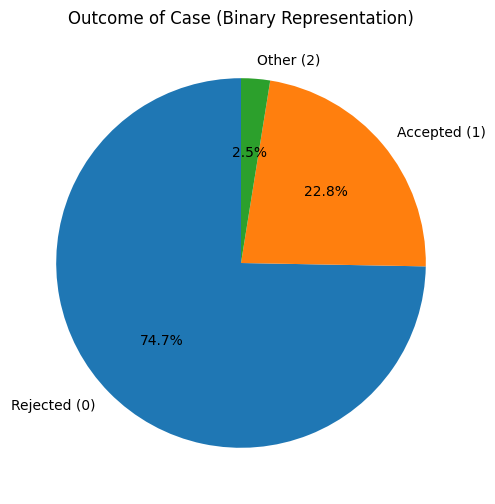

In [440]:
# ספירת הערכים הבינאריים בעמודת binary_outcome
outcome_category = full_final_df['outcome_category'].value_counts()

labels = ['Rejected (0)','Accepted (1)','Other (2)']

plt.figure(figsize=(6, 6))
plt.pie(outcome_category, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Outcome of Case (Binary Representation)')

plt.show()

###

In [441]:
full_final_df

,גוף המסמך,מספר הליך,Outcome of case,שנת פתיחת ההליך,outcome_category
0,"['פסק דין בתיק ע""פ 9917/02 בבית המשפט העליון ב...","ע""פ 9917/02",O R,2002,1
1,"['פסק-דין בתיק ע""פ 845/02 בבית המשפט העליון בש...","ע""פ 845/02",O R,2002,1
2,"['פסק-דין בתיק ע""פ 4379/02 בבית המשפט העליון ב...","ע""פ 4379/02",O A,2002,0
3,"['פסק דין בתיק ע""פ 9059/03 בבית המשפט העליון ב...","ע""פ 9059/03",O A,2003,0
4,"['פסק-דין בתיק ע""פ 7075/03 בבית המשפט העליון ב...","ע""פ 7075/03",O A,2003,0
...,...,...,...,...,...
1605,"['החלטה בתיק רע""פ 242/07 בבית המשפט העליון רע""...","רע""פ 242/07",O R approved in part + denied in part,2007,2
1658,"['פסק דין בתיק רע""פ 7446/07 בבית המשפט העליון ...","רע""פ 7446/07",G A,2007,0
1688,"['החלטה בתיק רע""פ 3248/07 בבית המשפט העליון רע...","רע""פ 3248/07",G V RETURN TO COURT with appellee's consent,2007,1
1741,"['פסק דין בתיק ע""פ 7450/01 בבית המשפט העליון ב...","ע""פ 7450/01",O A,2001,0


# Merge DF

In [442]:
df = pd.concat([full_final_df, data_to_add_1, data_to_add_2], ignore_index=True)

In [443]:
df

,גוף המסמך,מספר הליך,Outcome of case,שנת פתיחת ההליך,outcome_category
0,"['פסק דין בתיק ע""פ 9917/02 בבית המשפט העליון ב...","ע""פ 9917/02",O R,2002,1
1,"['פסק-דין בתיק ע""פ 845/02 בבית המשפט העליון בש...","ע""פ 845/02",O R,2002,1
2,"['פסק-דין בתיק ע""פ 4379/02 בבית המשפט העליון ב...","ע""פ 4379/02",O A,2002,0
3,"['פסק דין בתיק ע""פ 9059/03 בבית המשפט העליון ב...","ע""פ 9059/03",O A,2003,0
4,"['פסק-דין בתיק ע""פ 7075/03 בבית המשפט העליון ב...","ע""פ 7075/03",O A,2003,0
...,...,...,...,...,...
1107,"[' בבית המשפט העליון רע""פ 4357/01 בפני: כבוד ה...","רע""פ 4357/01",NaN,2001,0
1108,"['פסק דין בתיק רע""פ 1218/21 בבית המשפט העליון ...","רע""פ 1218/21",NaN,2021,2
1109,"['פסק דין בתיק רע""פ 7316/21 בבית המשפט העליון ...","רע""פ 7316/21",NaN,2021,0
1110,"['פסק דין בתיק רע""פ 7951/21 בבית המשפט העליון ...","רע""פ 7951/21",NaN,2021,1


In [444]:
duplicates = df[df["מספר הליך"].duplicated(keep=False)]
(duplicates)


,גוף המסמך,מספר הליך,Outcome of case,שנת פתיחת ההליך,outcome_category
33,"['החלטה בתיק ע""פ 10752/04 בבית המשפט העליון בש...","ע""פ 10752/04",O R,2004,1
34,"['החלטה בתיק ע""פ 10752/04 בבית המשפט העליון בש...","ע""פ 10752/04",O R,2004,1
37,"['פסק-דין בתיק ע""פ 8641/04 בבית המשפט העליון ב...","ע""פ 8641/04",O A,2004,0
38,"['פסק-דין בתיק ע""פ 8641/04 בבית המשפט העליון ב...","ע""פ 8641/04",O R,2004,1
47,"['פסק-דין בתיק ע""פ 7211/04 בבית המשפט העליון ב...","ע""פ 7211/04",O A,2004,0
48,"['פסק-דין בתיק ע""פ 7211/04 בבית המשפט העליון ב...","ע""פ 7211/04",O R,2004,1
87,"['פסק-דין בתיק ע""פ 2606/04בבית המשפט העליון בש...","ע""פ 2606/04",O A,2004,0
88,"['פסק-דין בתיק ע""פ 2606/04בבית המשפט העליון בש...","ע""פ 2606/04",O A,2004,0
89,"['פסק-דין בתיק ע""פ 2606/04בבית המשפט העליון בש...","ע""פ 2606/04",O A,2004,0
120,"['פסק-דין בתיק רע""פ 11432/04 בבית המשפט העליון...","רע""פ 11432/04",G V (vacated in part),2004,2


In [445]:
df.drop_duplicates(subset = ["מספר הליך","גוף המסמך"],keep='first',inplace=True)

In [446]:
df

,גוף המסמך,מספר הליך,Outcome of case,שנת פתיחת ההליך,outcome_category
0,"['פסק דין בתיק ע""פ 9917/02 בבית המשפט העליון ב...","ע""פ 9917/02",O R,2002,1
1,"['פסק-דין בתיק ע""פ 845/02 בבית המשפט העליון בש...","ע""פ 845/02",O R,2002,1
2,"['פסק-דין בתיק ע""פ 4379/02 בבית המשפט העליון ב...","ע""פ 4379/02",O A,2002,0
3,"['פסק דין בתיק ע""פ 9059/03 בבית המשפט העליון ב...","ע""פ 9059/03",O A,2003,0
4,"['פסק-דין בתיק ע""פ 7075/03 בבית המשפט העליון ב...","ע""פ 7075/03",O A,2003,0
...,...,...,...,...,...
1107,"[' בבית המשפט העליון רע""פ 4357/01 בפני: כבוד ה...","רע""פ 4357/01",NaN,2001,0
1108,"['פסק דין בתיק רע""פ 1218/21 בבית המשפט העליון ...","רע""פ 1218/21",NaN,2021,2
1109,"['פסק דין בתיק רע""פ 7316/21 בבית המשפט העליון ...","רע""פ 7316/21",NaN,2021,0
1110,"['פסק דין בתיק רע""פ 7951/21 בבית המשפט העליון ...","רע""פ 7951/21",NaN,2021,1


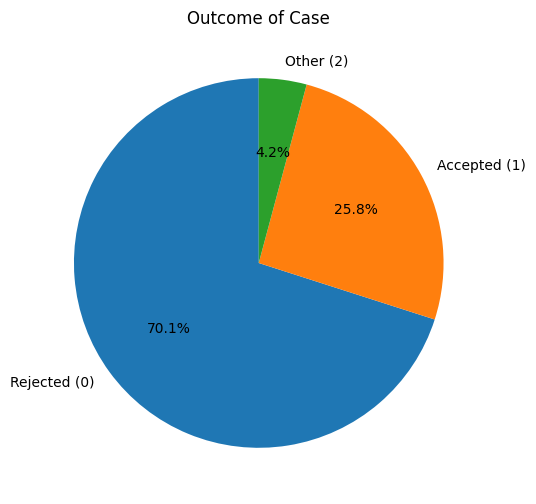

In [447]:
# ספירת הערכים הבינאריים בעמודת binary_outcome
outcome_category = df['outcome_category'].value_counts()

labels = ['Rejected (0)','Accepted (1)','Other (2)']

plt.figure(figsize=(6, 6))
plt.pie(outcome_category, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Outcome of Case')

plt.show()

In [448]:
df["שנת פתיחת ההליך"].value_counts()

,count
שנת פתיחת ההליך,
2006,412
2005,280
2007,219
2004,94
2003,30
2010,11
2015,10
2000,10
2011,10


In [449]:
file_path = 'full_final_df.csv'  # נתיב לשמירה
df.to_csv(file_path, index=False, encoding='utf-8')

print(f"הקובץ נשמר בהצלחה בנתיב: {file_path}")

הקובץ נשמר בהצלחה בנתיב: full_final_df.csv
